<img src="../assets/Semana 14 - Reprograma Mariana Pires.png" />

<style>
ul {
  list-style: none;
}
ul li:before {
  content: '(✓)';
}
</style>
<h2 style='font-family: Lucida Console; text-align:center'>Descrição:</h2>

<p style="text-align: justify"> Nesta semana trabalharemos com a formulação de insights e visualização dos mesmos utilizando de bases de dados da empresa Olist fornecidas pela professora Deborah. Resolvi criar a minha base do zero. Mais informações abaixo. </p>

<h2 style='font-family: Lucida Console; text-align:center'><b>Checklist:</b></h2>
<ul style="text-align: justify"><li> Formular o mínimo de 4 perguntas para responder com suas análises;</li>
<li> Utilizar pelo menos 3 bases de dados da Olist (caso você deseje criar sua base do zero);</li>
<li> Criar pelo menos 3 gráficos;</li>
<li> Exporte sua base final;</li>

Submeta uma pasta que contenha:
<div style="margin: 0.5em"><li> O arquivo seu_nome.ipynb com sua análise exploratória;</li>
<li> A base final criada por você no formato .csv;</li>
<li> As bases da olist em .csv que você utilizou na criação da sua análise exploratória;</li></div>



In [1]:
#Importando a biblioteca que utilizaremos no início da atividade
import pandas as pd

In [179]:
#Criando os dataframes utilizados na atividade
df_vendedores = pd.read_csv('../../../material/datasets_olist/olist_sellers_dataset.csv')
df_clientes = pd.read_csv('../../../material/datasets_olist/olist_customers_dataset.csv')
df_produtos = pd.read_csv('../../../material/datasets_olist/olist_products_dataset.csv')

<h2 style='font-family: Lucida Console; text-align:center;'>Limpeza dos dados:</h2>

<h4 style='font-family: Lucida Console; text-align:justify;'><ul><li>Primeiro dataframe:</li></ul></h4>
<p style="text-align: justify">O primeiro dataframe que iremos limpar será o voltado para localização de vendedores.</p>
<p style="text-align: justify">Iremos utilizar as seguintes colunas: </p>
<ul>
<li><b>seller_city</b>: a cidade de onde é o vendedor.</li>
<li><b>seller_state</b>: a sigla do estado de onde é o vendedor.</li>
</ul>
<p style="text-align: justify">E removeremos: </p>
<ul>
<li><b>seller_id</b>: coluna identificadora do vendedor.</li>
<li><b>seller_zip_code_prefix</b>: os 5 primeiros dígitos que correspondem ao CEP do vendedor.</li>
</ul>

In [180]:
#Checando aqui o formato original da tabela
df_vendedores

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [181]:
#Como não utilizaremos as colunas seller_zip_code e seller_id, aqui começaremos a limpar o dataframe
df_vendedores = df_vendedores.drop(columns=['seller_zip_code_prefix', 'seller_id'])

In [182]:
#Exibindo a coluna limpa
df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_city   3095 non-null   object
 1   seller_state  3095 non-null   object
dtypes: object(2)
memory usage: 48.5+ KB


<ul><h4 style='font-family: Lucida Console; text-align:justify; margin-left: 0 !important;'><li>Segundo dataframe:</li></h4></ul>
<p style="text-align: justify">O segundo dataframe que iremos limpar será o voltado para localização de clientes.</p>
<p style="text-align: justify">Iremos utilizar as seguintes colunas: </p>
<ul>
<li><b>customer_city</b>: a cidade de onde é o vendedor.</li>
<li><b>customer_state</b>: a sigla do estado de onde é o vendedor.</li>
</ul>
<p style="text-align: justify">E removeremos: </p>
<ul>
<li><b>customer_unique_id</b>: uma ID única para cada usuário.</li>
<li><b>customer_id</b>: removeremos esta coluna, pois ela representa um valor temporário gerado todas as vezes que um consumidor faz um pedido.</li>
<li><b>customer_zip_code_prefix	</b>: os 5 primeiros dígitos do CEP do comprador.</li>
</ul>

In [186]:
#Limpando o que não iremos utilizar no dataframe
df_clientes = df_clientes.drop(columns=['customer_id','customer_zip_code_prefix', 'customer_unique_id'])

In [187]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_city   99441 non-null  object
 1   customer_state  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


<ul><h4 style='font-family: Lucida Console; text-align:justify; margin-left: 0 !important;'><li>Terceiro dataframe:</li></h4></ul>
<p style="text-align: justify">O terceiro dataframe que iremos limpar será o voltado para os produtos vendidos.</p>
<p style="text-align: justify">Iremos utilizar as seguintes colunas: </p>
<ul>
<li><b>product_category_name</b>: categoria em que o produto se enquadra.</li>
<li><b>product_weight_g</b>: peso do produto em gramas.</li>
<li><b>product_height_cm</b>: altura do produto em cm.</li>
<li><b>product_width_cm</b>: largura do produto em cm.</li>

</ul>
<p style="text-align: justify">E removeremos: </p>
<ul>
<li><b>product_id</b>: uma ID única para cada produto.</li>
<li><b>product_name_lenght</b>: quantidade de caracteres do nome do produto.</li>
<li><b>product_description_lenght	</b>: quantidade de caracteres de descrição do produto.</li>
<li><b>product_photos_qty	</b>: quantidade de fotos atrelada ao produto.</li>
<li><b>product_length_cm	</b>: comprimento do produto em cm.</li>
</ul>

In [188]:
df_produtos

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [189]:
#Mais uma vez limpando o dataframe
df_produtos = df_produtos.drop(columns=['product_name_lenght','product_description_lenght','product_photos_qty','product_length_cm', 'product_id'])

In [190]:
df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_category_name  32341 non-null  object 
 1   product_weight_g       32949 non-null  float64
 2   product_height_cm      32949 non-null  float64
 3   product_width_cm       32949 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


<ul><h4 style='font-family: Lucida Console; text-align:justify; margin-left: 0 !important;'><li>Troubleshooting:</li></h4></ul>
<p style="text-align: justify">Para juntarmos as três colunas utilizando a função merge(), elas precisam ter uma coluna com um nome em comum. E, como foi visto até então, não é o caso para as colunas atuais. </p>
<p style="text-align: justify">Para resolver o problema, eu criarei uma coluna nova.</p>

In [64]:
#Como visto abaixo, não funciona sem uma coluna com um nome em comum. Eu criarei uma coluna nova
df_final = pd.merge(df_clientes, df_vendedores, df_produtos, on='')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [191]:
#Criando o campo merge_id com pd.Series()
df_clientes['merge_id'] = range(len(df_clientes))
df_vendedores['merge_id'] = range(len(df_vendedores))
df_produtos['merge_id'] = range(len(df_produtos))

In [200]:
#Merging
df_temp = df_clientes.merge(df_vendedores, on='merge_id', how='left', suffixes=('_clientes', '_vendedores'))
df_final = df_temp.merge(df_produtos, on='merge_id', how='left', suffixes=('', '_produtos'))

In [194]:
#Resultado final
df_final

customer_city customer_state  merge_id        seller_city  \
0                     franca             SP         0           campinas   
1      sao bernardo do campo             SP         1         mogi guacu   
2                  sao paulo             SP         2     rio de janeiro   
3            mogi das cruzes             SP         3          sao paulo   
4                   campinas             SP         4  braganca paulista   
...                      ...            ...       ...                ...   
99436              sao paulo             SP     99436                NaN   
99437        taboao da serra             SP     99437                NaN   
99438              fortaleza             CE     99438                NaN   
99439                 canoas             RS     99439                NaN   
99440                  cotia             SP     99440                NaN   

      seller_state  product_category_name  product_weight_g  \
0               SP             perfumaria             225.0   
1               SP                  artes            1000.0   
2               RJ          esporte_lazer             154.0   
3               SP                  bebes             371.0   
4               SP  utilidades_domesticas             625.0   
...            ...                    ...               ...   
99436          NaN                    NaN               NaN   
99437          NaN                    NaN               NaN   
99438          NaN                    NaN               NaN   
99439          NaN                    NaN               NaN   
99440          NaN                    NaN               NaN   

       product_height_cm  product_width_cm  
0                   10.0              14.0  
1                   18.0              20.0  
2                    9.0              15.0  
3                    4.0              26.0  
4                   17.0              13.0  
...                  ...               ...  
99436                NaN               NaN  
99437                NaN               NaN  
99438                NaN               NaN  
99439                NaN               NaN  
99440                NaN               NaN  

[99441 rows x 9 columns]

In [195]:
#Exportando a base final
df_final.to_csv('base_final_s14.csv', index=False)

<h2 style='font-family: Lucida Console; text-align:center;'>Análise de Dados:</h2>
<p style="text-align: justify">Agora vamos responder as seguintes questões através dos dados:</p>
<ul><h4 style='font-family: Lucida Console; text-align:justify; margin-left: 0 !important;'><li>Quais são os tipos de produtos mais comuns comprado por clientes da cidade de São Paulo?</li></h4></ul>

In [208]:
#Primeiro vamos isolar o df para compradores de São Paulo
df_sao_paulo = df_final[df_final['customer_city'] == 'sao paulo'] 
#Agora vamos separar as categorias de produtos compradas
df_sao_paulo_cat = df_sao_paulo['product_category_name'].value_counts()
#Agora vamos exibir os resultados de maneira descendente
contagem_categorias = df_sao_paulo_cat.sort_values(ascending=False)
#Criando um ranking
top_contagem_categorias = contagem_categorias.head(10)

#O output
print(f"Os tipos de produtoss mais comuns comprados por clientes de São Paulo são: \n {top_contagem_categorias}")

Os tipos de produtoss mais comuns comprados por clientes de São Paulo são: 
 product_category_name
cama_mesa_banho           505
esporte_lazer             434
moveis_decoracao          420
beleza_saude              394
utilidades_domesticas     341
automotivo                309
brinquedos                247
informatica_acessorios    240
relogios_presentes        216
telefonia                 167
Name: count, dtype: int64


<ul><h4 style='font-family: Lucida Console; text-align:justify; margin-left: 0 !important;'><li>Em Salvador, há mais compradores ou vendores?</li></h4></ul>

In [218]:
#Criando variáveis para os vendedores e compradores de Salvador
compradores_salvador = df_final[df_final['customer_city'] == 'salvador']
vendedores_salvador = df_final[df_final['seller_city'] == 'salvador']
#Agora determinando o número de vezes que eles aparecem no df_final
numero_compradores = len(compradores_salvador)
numero_vendedores = len(vendedores_salvador)
#Agora uma pequena estrutura para imprimir o valor com a resposta
if numero_compradores > numero_vendedores:
  print(f'Há mais compradores que vendedores em Salvador. \n O número de vendedores é: {numero_vendedores}, enquanto o de compradores é {numero_compradores}.')
elif numero_vendedores > numero_compradores:
  print(f"Há mais vendedore que compradores em Salvador \n O número de vendedores é: {numero_vendedores}, enquanto o de compradores é {numero_compradores}.")
else:
  print(f"Há um número idêntico entre vendedores e compradores de Salvador no dataframe \n O número de vendedores é: {numero_vendedores}, enquanto o de compradores é {numero_compradores}.")

Há mais compradores que vendedores em Salvador. 
 O número de vendedores é: 7, enquanto o de compradores é 1245.


<ul><h4 style='font-family: Lucida Console; text-align:justify; margin-left: 0 !important;'><li>Qual a cidade que tem mais compradores? Qual tem mais vendedores?</li></h4></ul>

In [228]:
#Começaremos contando o número único de vendedores e compradores pela cidade
contagem_vendedores = df_clientes.groupby('customer_city')['merge_id'].nunique().reset_index()
contagem_clientes = df_vendedores.groupby('seller_city')['merge_id'].nunique().reset_index()
# Renomenado as colunas com o resultado da contagem
contagem_vendedores = contagem_vendedores.rename(columns={'merge_id': 'num_buyers'})
contagem_clientes = contagem_clientes.rename(columns={'merge_id': 'num_sellers'})
# Descobrindo a cidade que tem mais vendedores e mais compradores
city_with_most_buyers = contagem_vendedores.sort_values('num_buyers', ascending=False).iloc[0]
city_with_most_sellers = contagem_clientes.sort_values('num_sellers', ascending=False).iloc[0]
#Imprimindo a resposta
print(f"A cidade com mais compradores é: {city_with_most_buyers['customer_city']} com o número de {city_with_most_buyers['num_buyers']} compradores.")
print(f"A cidade com mais vendedores é {city_with_most_sellers['seller_city']} com o número de {city_with_most_sellers['num_sellers']} vendedores.")


A cidade com mais compradores é: sao paulo com o número de 15540 compradores.
A cidade com mais vendedores é sao paulo com o número de 694 vendedores.


<ul><h4 style='font-family: Lucida Console; text-align:justify; margin-left: 0 !important;'><li>Qual a média de peso dos produtos vendidos por categoria?</li></h4></ul>

In [248]:
#Agrupando por product_category_name e a média de peso em grama
contagem_media = df_final.groupby('product_category_name')['product_weight_g'].mean()
#Resetando o index para evitar erros
contagem_media.reset_index()
#Para fins de formatação, a média terá apenas 2 casas decimais após o ponto
media_formatada = contagem_media.map('{:.2f}'.format)
#Demonstrando os valores
print(f"Os 5 produtos mais pesados estão nas categorias (e com as respectivas médias em gramas): \n{media_formatada.head(5)}\n")
print(f"Os 5 produtos mais leves estão nas categorias (e com as respectivas médias em gramas): \n{media_formatada.tail(5)}")

Os 5 produtos mais pesados estão nas categorias (e com as respectivas médias em gramas): 
product_category_name
agro_industria_e_comercio    5263.41
alimentos                     923.41
alimentos_bebidas            1307.93
artes                        1691.76
artes_e_artesanato           1164.58
Name: product_weight_g, dtype: object

Os 5 produtos mais leves estão nas categorias (e com as respectivas médias em gramas): 
product_category_name
sinalizacao_e_seguranca     2969.82
tablets_impressao_imagem     381.44
telefonia                    236.51
telefonia_fixa               660.83
utilidades_domesticas       3020.79
Name: product_weight_g, dtype: object


<h2 style='font-family: Lucida Console; text-align:center;'>Visualização de dados:</h2>
<p style="text-align: justify">Agora vamos criar três visualizações de planilhas com o dataframe final:</p>

In [249]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

<ul><h4 style='font-family: Lucida Console; text-align:justify; margin-left: 0 !important;'><li>Em quais categorias estão os maiores produtos vendidos?</li></h4></ul>

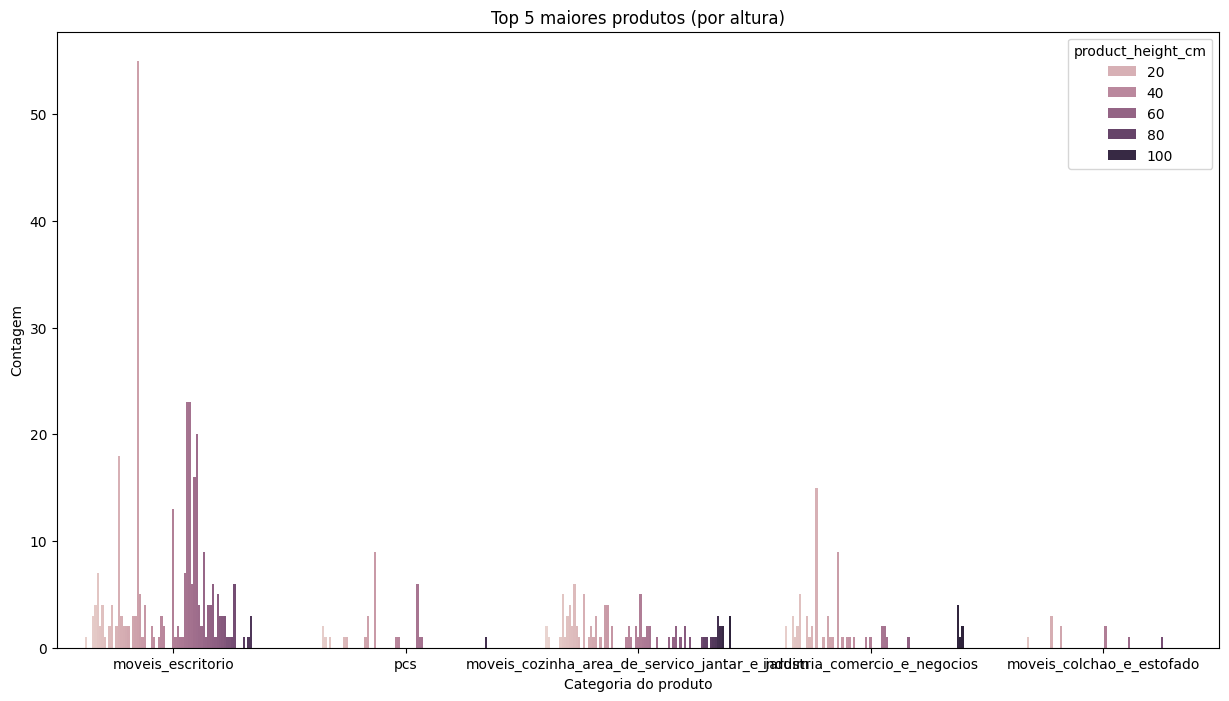

In [264]:
#Selecionando o top 5 de categorias de produto por tamanho em cm 
top_categorias = df_final.groupby('product_category_name')['product_height_cm'].mean().nlargest(5).index
#Filtrando o dataframe para as categorias que eu selecionei
df_filtrado = df_final[df_final['product_category_name'].isin(top_categorias)]
# Definir tamanho da figura
plt.figure(figsize=(15, 8))
primeiros_rank  = df_final['product_category_name'].head(5)
# Instanciar o tipo de plotagem
sns.countplot(data=df_filtrado, x='product_category_name', hue='product_height_cm')
# Definir texto do título e eixos x e y
plt.title('Top 5 maiores produtos (por altura)')
plt.xlabel('Categoria do produto')
plt.ylabel('Contagem')

plt.show()

<ul><h4 style='font-family: Lucida Console; text-align:justify; margin-left: 0 !important;'><li>Qual a visualização do número de clientes por estado?</li></h4></ul>

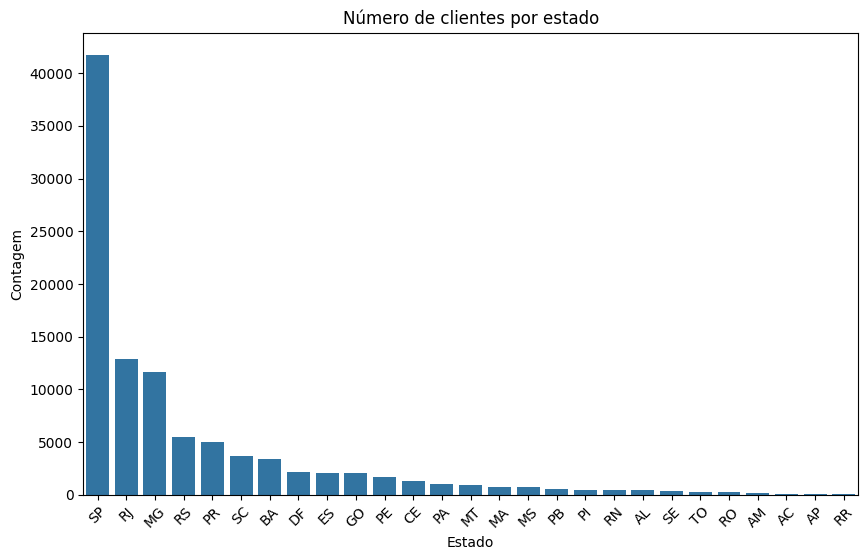

In [275]:
# Definir tamanho da figura
plt.figure(figsize=(10, 6))
# Determinando de forma decrescente a contagem para melhor visualização 
contagem_estado = df_final['customer_state'].value_counts().reset_index()
contagem_estado.columns = ['State', 'Count']
contagem_estado = contagem_estado.sort_values(by='Count', ascending=False)
# Instanciar a contagem por estado
sns.barplot(data=contagem_estado, x='State', y='Count', order=contagem_estado['State'])
# Definir texto do título e eixos x e y
plt.title('Número de clientes por estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')
# Definindo a rotação pra ficar mais fácil de ler
plt.xticks(rotation=45)
#Mostrando a tabela final
plt.show()

<ul><h4 style='font-family: Lucida Console; text-align:justify; margin-left: 0 !important;'><li>Qual a visualização do número de vendedores por estado?</li></h4></ul>

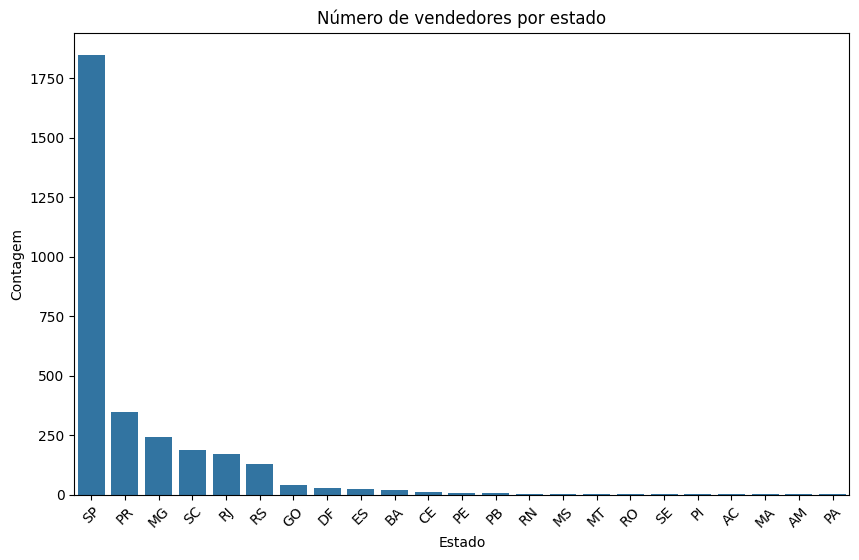

In [276]:
# Definir tamanho da figura
plt.figure(figsize=(10, 6))
# Determinando de forma decrescente a contagem para melhor visualização 
contagem_estado_vendedor = df_final['seller_state'].value_counts().reset_index()
contagem_estado_vendedor.columns = ['State', 'Count']
contagem_estado_vendedor = contagem_estado_vendedor.sort_values(by='Count', ascending=False)
# Instanciar a contagem por estado
sns.barplot(data=contagem_estado_vendedor, x='State', y='Count', order=contagem_estado_vendedor['State'])
# Definir texto do título e eixos x e y
plt.title('Número de vendedores por estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')
# Definindo a rotação pra ficar mais fácil de ler
plt.xticks(rotation=45)
#Mostrando a tabela final
plt.show()